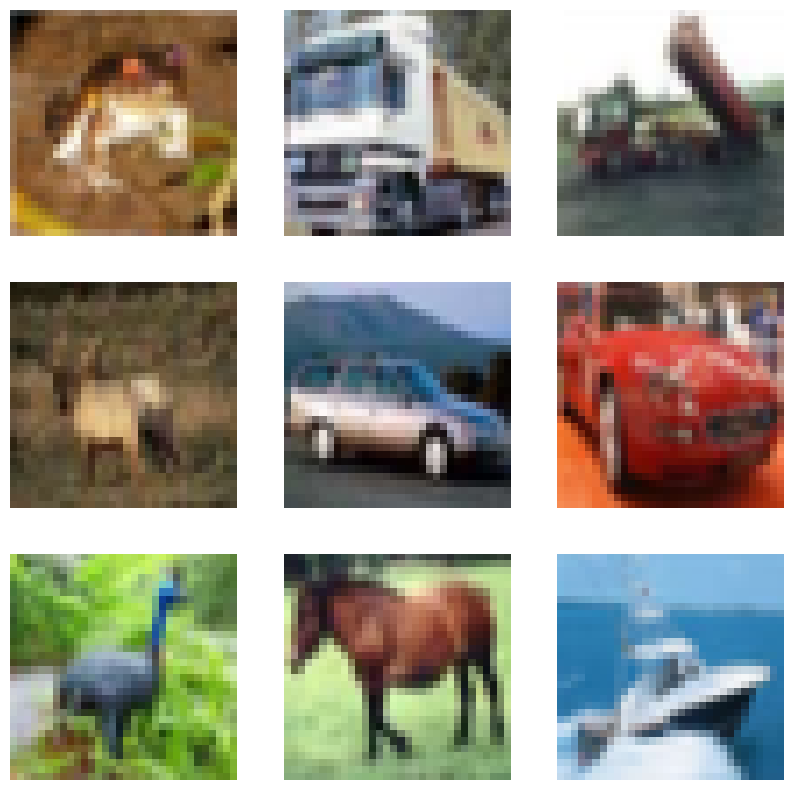

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# CIFAR-10 veri setini yükle
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Veriyi normalize et
x_train = x_train / 255.0
x_test = x_test / 255.0

# Veriyi görselleştir
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

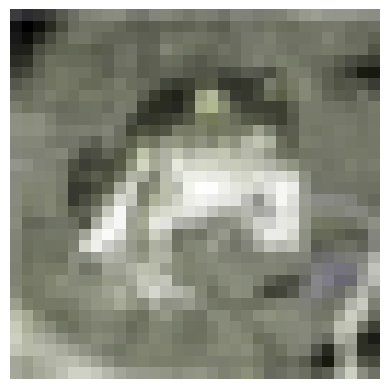

In [3]:
import numpy as np
from PIL import Image

# Renk körlüğü simülasyonu fonksiyonu (deuteranopia - yeşil körlüğü)
def simulate_color_blindness(image, type='deuteranopia'):
    image = Image.fromarray((image * 255).astype(np.uint8))  # Görseli 0-255 arası değerlere dönüştür
    image = image.convert('RGB')
    
    # Renk körlüğü türüne göre dönüşüm matrisleri
    if type == 'deuteranopia':  # Yeşil körlüğü
        matrix = np.array([[0.625, 0.375, 0],
                           [0.7, 0.3, 0],
                           [0.3, 0.7, 0]])
    elif type == 'protanopia':  # Kırmızı körlüğü
        matrix = np.array([[0.56667, 0.43333, 0],
                           [0.55833, 0.44167, 0],
                           [0.3, 0.7, 0]])
    elif type == 'tritanopia':  # Mavi körlüğü
        matrix = np.array([[0.95, 0.05, 0],
                           [0, 0.43333, 0.56667],
                           [0, 0.475, 0.525]])

    image_array = np.array(image)
    transformed_image = np.dot(image_array[..., :3], matrix.T)
    transformed_image = np.clip(transformed_image, 0, 255)  # Görseli 0-255 arasında tut
    return transformed_image.astype(np.uint8)

# Renk körlüğü simülasyonu yap
simulated_image = simulate_color_blindness(x_train[0], type='deuteranopia')

# Simüle edilmiş görseli göster
plt.imshow(simulated_image)
plt.axis('off')
plt.show()


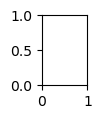

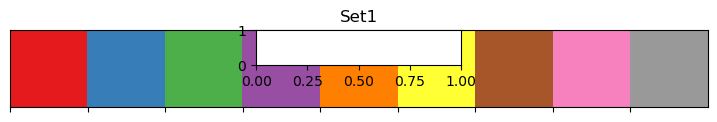

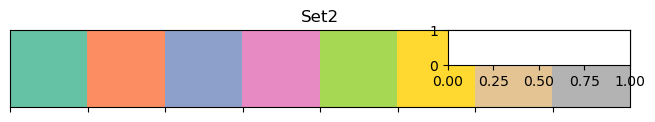

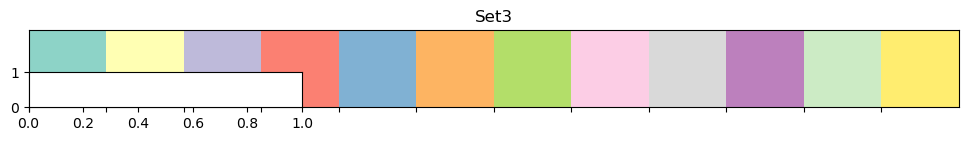

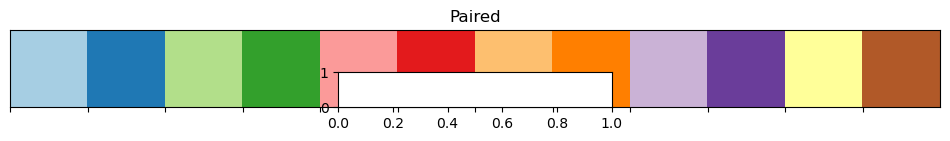

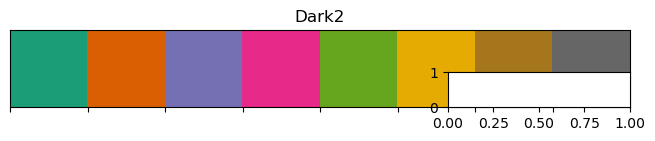

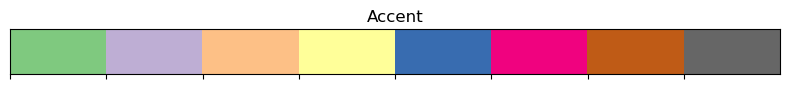

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Color Brewer paletlerini görselleştirme
palettes = ['Set1', 'Set2', 'Set3', 'Paired', 'Dark2', 'Accent']

plt.figure(figsize=(2, 2))
for i, palette in enumerate(palettes, 1):
    plt.subplot(2, 3, i)
    sns.palplot(sns.color_palette(palette))
    plt.title(palette)
plt.tight_layout()
plt.show()

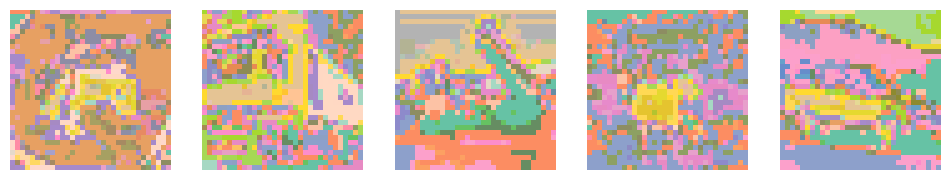

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# CIFAR-10 veri setini yükleyelim
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0  # Normalize etme

# Color Brewer paleti (örneğin: Set2) seçelim
palette = sns.color_palette('Set2')

# Color Brewer paletini RGB değerleri olarak almak
palette_rgb = np.array(palette)

# Görseli doğru şekilde paletle dönüştürmek için fonksiyon
def apply_color_palette(image, palette):
    # Görseli 0-1 aralığında normalize edilmiş durumda alıyoruz
    image = image * 255.0
    image = image.astype(np.uint8)
    
    # Görselin her bir kanalındaki değeri, Color Brewer paletindeki renklerle eşleştir
    transformed_image = np.zeros_like(image)
    
    for i in range(3):  # RGB kanalları için
        # Her kanalın min ve max değerlerine göre normalize et
        channel_min, channel_max = image[..., i].min(), image[..., i].max()
        transformed_image[..., i] = np.interp(image[..., i], (channel_min, channel_max), (0, len(palette) - 1)).astype(np.uint8)
    
    # Paletten renkleri alıp her pikselin rengini atama
    reshaped_image = np.zeros_like(image)
    for i in range(3):
        reshaped_image[..., i] = palette_rgb[transformed_image[..., i], i] * 255  # RGB değerini 0-255'e dönüştür
    
    return reshaped_image.astype(np.uint8)

# Görselleri Color Brewer paletiyle dönüştürüp gösterelim
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    transformed_img = apply_color_palette(x_train[i], palette)
    plt.imshow(transformed_img)
    plt.axis('off')
plt.show()


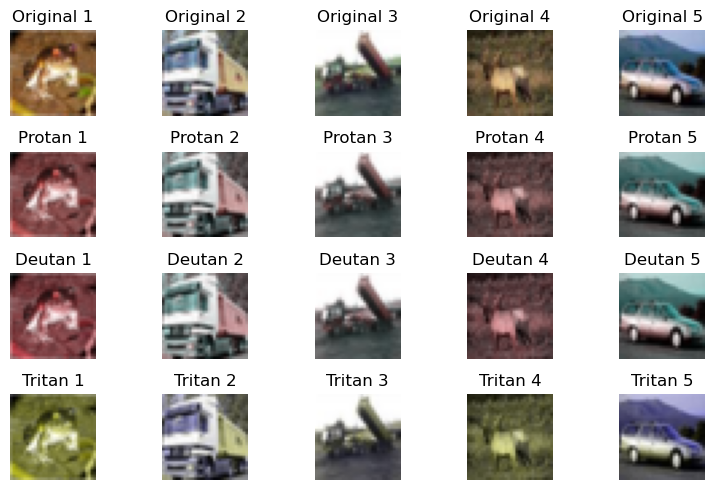

In [69]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# CIFAR-10 verilerini yükleyelim
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Renk körlüğü türlerine göre dönüşüm matrisleri (Protanopia, Deuteranopia, Tritanopia)
def simulate_color_blindness(image, type="deutan"):
    # BGR renk uzayına dönüştür
    image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if type == "protan":
        # Protanopia için dönüşüm matrisi
        matrix = np.array([[0.567, 0.433, 0], [0.558, 0.442, 0], [0, 0.242, 0.758]])
    elif type == "deutan":
        # Deuteranopia için dönüşüm matrisi
        matrix = np.array([[0.625, 0.375, 0], [0.7, 0.3, 0], [0, 0.3, 0.7]])
    elif type == "tritan":
        # Tritanopia için dönüşüm matrisi
        matrix = np.array([[0.95, 0.05, 0], [0, 0.433, 0.567], [0, 0.475, 0.525]])
    else:
        raise ValueError("Unknown type of color blindness.")

    # Uygulama
    image_cb = cv2.transform(image_bgr, matrix)
    image_cb = np.clip(image_cb, 0, 255)  # Piksel değerlerini 0-255 arasında tut
    return cv2.cvtColor(image_cb.astype(np.uint8), cv2.COLOR_BGR2RGB)  # RGB'ye geri dönüştür

# Dinamik olarak görselleri dönüştürüp görselleştirelim
num_images = 5  # Görselleştirilecek resim sayısı

# Renk körlüğü simülasyonu için her bir görseli değiştirelim
types = ['protan', 'deutan', 'tritan']

# Yeni bir subplot oluşturuyoruz (her resmin 4 versiyonu olacak: Orijinal + 3 renk körlüğü türü)
fig, axes = plt.subplots(4, num_images, figsize=(8, 5))  # 4 satır ve num_images sütunlu

for i in range(num_images):
    # Orijinal görselleri göstermek için
    axes[0, i].imshow(x_train[i])
    axes[0, i].set_title(f"Original {i+1}")
    axes[0, i].axis('off')
    
    for j, type in enumerate(types):
        # Her renk körlüğü türü için dönüştürülmüş görselleri gösterelim
        transformed_img = simulate_color_blindness(x_train[i], type)
        axes[j+1, i].imshow(transformed_img)
        axes[j+1, i].set_title(f"{type.capitalize()} {i+1}")
        axes[j+1, i].axis('off')

# Görselleştirmeyi yapalım
plt.tight_layout()
plt.show()
